In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Reading the data
df_csr = pd.read_csv('/Users/kundra/Downloads/311_Service_Requests_from_2010_to_Present.csv', parse_dates=['Created Date', 'Closed Date'])

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#First 5 observations
df_csr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
#Understanding the data
df_csr.shape

(300698, 53)

In [6]:
#Data Types
df_csr.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [7]:
#Creating a new column as the time elapsed between request creation and request closing
df_csr['Request_Closing_Time'] = df_csr['Closed Date'] - df_csr['Created Date']

In [8]:

df_csr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [9]:
df_csr.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [10]:
#Adding a column to find resolution time in minutes

df_csr['Res_Time_Min'] = df_csr['Request_Closing_Time']/ np.timedelta64(1,'m')

In [11]:
df_csr.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude,Request_Closing_Time,Res_Time_Min
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000,298534,298534.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630,0 days 04:18:51.832782,258.863880
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454,0 days 06:05:22.141833,365.369031
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,0 days 00:01:00,1.000000
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142,0 days 01:16:33,76.550000
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781,0 days 02:42:55.500000,162.925000
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805,0 days 05:21:00,321.000000
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760,24 days 16:52:22,35572.366667


In [12]:
df_csr.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [13]:
#Finding the null values in the data
df_csr.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [14]:
#Removing the columns which have all redundant or null values
df_csr_short = df_csr.drop(columns = ['Agency','Vehicle Type','Taxi Company Borough', 'Taxi Pick Up Location', 'Garage Lot Name','School or Citywide Complaint'])

In [15]:
df_csr_short.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time,Res_Time_Min
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,297158.000000,297158.000000,298534,298534.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,40.725885,-73.925630,0 days 04:18:51.832782,258.863880
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,0.082012,0.078454,0 days 06:05:22.141833,365.369031
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937,0 days 00:01:00,1.000000
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,40.669796,-73.972142,0 days 01:16:33,76.550000
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,40.718661,-73.931781,0 days 02:42:55.500000,162.925000
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,40.781840,-73.876805,0 days 05:21:00,321.000000
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760,24 days 16:52:22,35572.366667


In [16]:
df_csr_short.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Res_Time_Min
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,207.033333


Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64


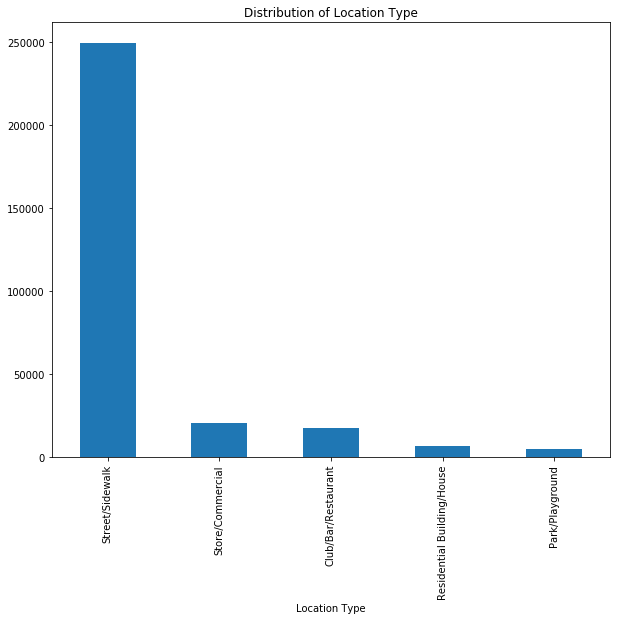

In [17]:
print(df_csr['Location Type'].value_counts())

plt.figure(figsize= (10,8))
plt.title('Distribution of Location Type')
plt.xlabel('Location Type')
df_csr['Location Type'].value_counts().head(5).plot(kind = 'bar')
plt.show()

In [18]:
df_csr['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

In [19]:
df_csr['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

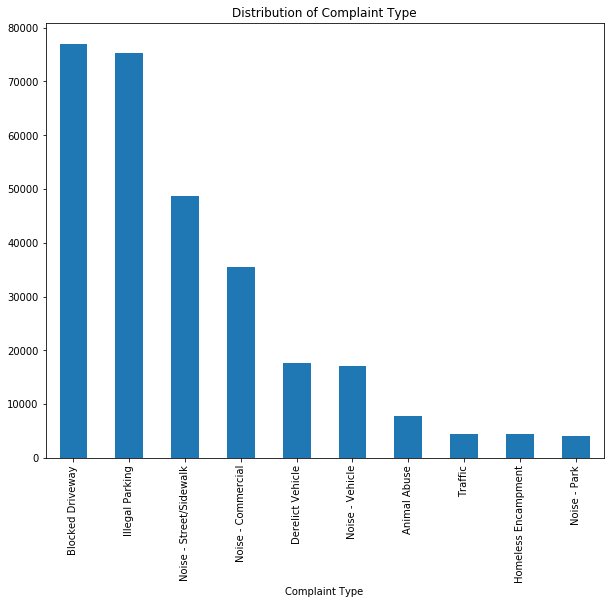

In [20]:
plt.figure(figsize= (10,8))
plt.title('Distribution of Complaint Type')
plt.xlabel('Complaint Type')
df_csr['Complaint Type'].value_counts().head(10).plot(kind = 'bar')
plt.show()

Text(0.5, 1.0, 'Distribution of Blocked Driveway in NYC')

<Figure size 720x576 with 0 Axes>

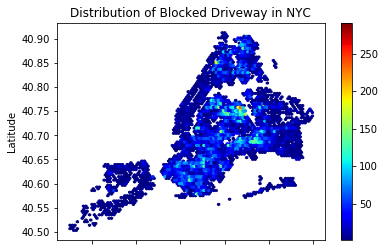

In [21]:
#Distribution of Complaints of Blocked Driveway in NYC
plt.figure(figsize=(10,8))
df_csr_short[df_csr_short['Complaint Type'] == 'Blocked Driveway'].plot(kind = 'hexbin', x = 'Longitude', y = 'Latitude', colormap = 'jet',mincnt=1)
plt.title('Distribution of Blocked Driveway in NYC')

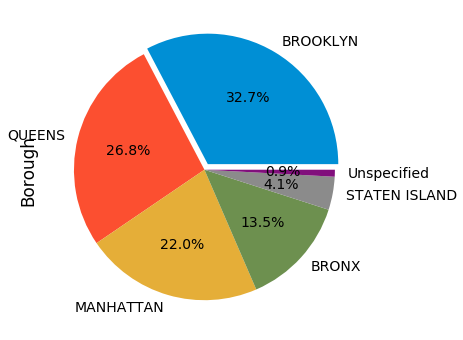

In [22]:
#Distribution of complaints across Borough
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
df_csr_short['Borough'].value_counts().plot(kind = 'pie', explode = (0.05,0,0,0,0,0), autopct = '%1.1f%%')


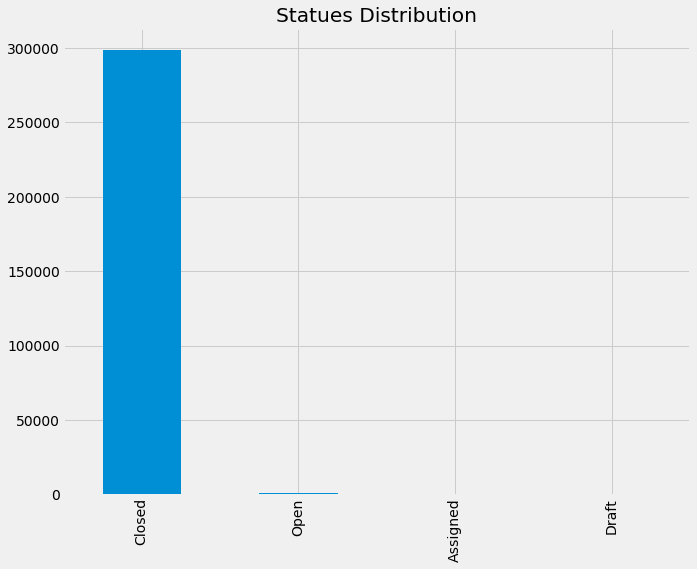

In [23]:
#Distribution of Status
plt.figure(figsize=(10,8))
plt.title('Statues Distribution')
plt.xlabel('')
df_csr_short['Status'].value_counts().plot(kind = 'bar')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


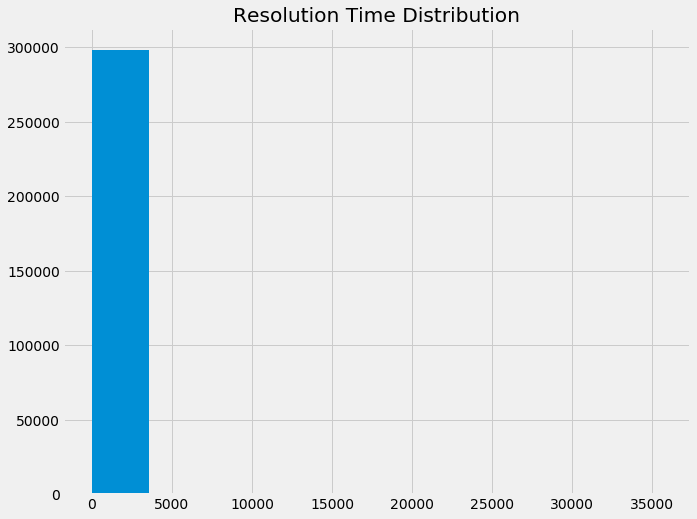

In [24]:
#Distribution of Resolution Time

plt.figure(figsize=(10,8))
plt.title('Resolution Time Distribution')
plt.xlabel('')
plt.hist(df_csr_short['Res_Time_Min'])
plt.show()


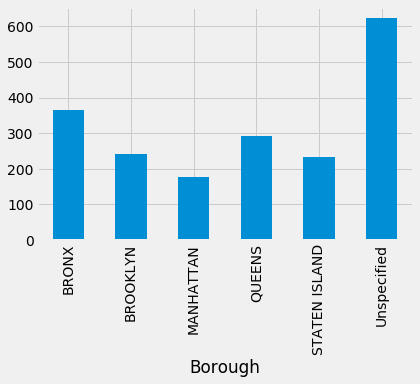

In [25]:
#Average Resolution Time grouped by Boroughs

df_csr_short.groupby('Borough')['Res_Time_Min'].mean().plot(kind = 'bar')

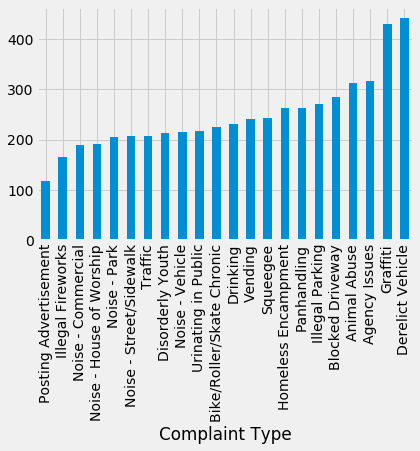

In [26]:
#Average Resolution Time grouped by Complaint type

df_csr_short.groupby('Complaint Type')['Res_Time_Min'].mean().sort_values().head(22).plot(kind = 'bar')


In [27]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

df_csr_short.groupby(['Borough','Complaint Type'], as_index = False)['Res_Time_Min'].mean().sort_values(['Borough', 'Res_Time_Min']).reset_index(drop = True)

,Borough,Complaint Type,Res_Time_Min
0,BRONX,Bike/Roller/Skate Chronic,207.538333
1,BRONX,Posting Advertisement,207.719608
2,BRONX,Disorderly Youth,254.304497
3,BRONX,Noise - House of Worship,273.572785
4,BRONX,Noise - Commercial,281.841054
...,...,...,...
114,Unspecified,Ferry Complaint,NaN
115,Unspecified,Noise - House of Worship,NaN
116,Unspecified,Panhandling,NaN
117,Unspecified,Posting Advertisement,NaN
